In [1]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246767 sha256=3a7a51af979e4ace6b6ea3c9da6c9e01a9bf06315c5feb26c5523cd5fc4ac05d
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [2]:
import fasttext
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [3]:
#for ssl problem
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [6]:
def remove_stopwords(text):
    # Türkçe stop kelimeleri yükleyin
    stop_words = set(stopwords.words('turkish'))

    # Metni tokenize edin
    word_tokens = word_tokenize(text, language='turkish')

    # Stop kelimeleri temizleyin
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    # Temizlenmiş metni birleştirin
    cleaned_text = ' '.join(filtered_text)
    #print("cleaned_text: ", cleaned_text)
    return cleaned_text

In [7]:
data = []
label = []
import re
def get_txt(file_path,real_or_fake):
    func_data = []
    func_label = []
    for filename in os.listdir(file_path):
        print(filename)
        if(filename.endswith('.txt')):
            with open(file_path+"/"+filename, 'r', encoding= 'utf-8' ) as file:
            #text clearing
                text = file.read()
                text = re.sub(r'[^\w\s]', '', text)
                text = re.sub(r'[ \n]+', ' ', text)
                text = text.strip().lower()

                #stop wordsleri temizleme 1272770 -> 1138016
                clean_text = remove_stopwords(text)
                data.append(clean_text)
                func_data.append(clean_text)
                if real_or_fake == 'real':
                    label.append('__label__1')
                    func_label.append('__label__1')
                else:
                    label.append('__label__0')
                    func_label.append('__label__0')
    return func_data, func_label

X_train_val_real, y_train_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/real",'real')
X_train_val_fake, y_train_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/fake",'fake')


#print(len(X_train_val_real),len(y_train_val_real))
#print(len(X_train_val_fake),len(y_train_val_fake))

X_train_val_combined = X_train_val_real + X_train_val_fake
y_train_val_combined = y_train_val_real + y_train_val_fake

#print()
#print(len(X_train_val_combined))
#print(len(y_train_val_combined))


X_test_val_real, y_test_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/real",'real')
X_test_val_fake, y_test_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/fake",'fake')

#print(len(X_test_val_real),len(y_test_val_real))
#print(len(X_test_val_fake),len(y_test_val_fake))

X_test_val_combined = X_test_val_real + X_test_val_fake
y_test_val_combined = y_test_val_real + y_test_val_fake

#print(len(X_test_val_combined),len(y_train_val_combined))


#shuffle train
X_train_val_combined = np.array(X_train_val_combined)
y_train_val_combined = np.array(y_train_val_combined)
indices = np.random.permutation(len(X_train_val_combined))
X_train_val_combined = X_train_val_combined[indices]
y_train_val_combined = y_train_val_combined[indices]


#shuffle test
X_test_val_combined = np.array(X_test_val_combined)
y_test_val_combined = np.array(y_test_val_combined)
indices2 =  np.random.permutation(len(X_test_val_combined))
X_test_val_combined = X_test_val_combined[indices2]
y_test_val_combined = y_test_val_combined[indices2]


print(len(X_train_val_combined),len(y_train_val_combined))
print(len(X_test_val_combined),len(y_test_val_combined))


Görüntülenen çıkış son 5000 satıra kısaltıldı.
fake4474.txt
fake4504.txt
fake4592.txt
fake4491.txt
fake4472.txt
fake4511.txt
fake4453.txt
fake4531.txt
fake447.txt
fake4601.txt
fake4478.txt
fake4503.txt
fake4506.txt
fake4512.txt
fake4459.txt
fake4526.txt
fake4603.txt
fake4564.txt
fake456.txt
fake453.txt
fake4468.txt
fake4530.txt
fake4483.txt
fake446.txt
fake4473.txt
fake4554.txt
fake4551.txt
fake448.txt
fake4600.txt
fake4515.txt
fake4538.txt
fake450.txt
fake4552.txt
fake4467.txt
fake4555.txt
fake460.txt
fake4489.txt
fake458.txt
fake4561.txt
fake4543.txt
fake4521.txt
fake4569.txt
fake4455.txt
fake4494.txt
fake4528.txt
fake4540.txt
fake4597.txt
fake4571.txt
fake4465.txt
fake4498.txt
fake4485.txt
fake4539.txt
fake4513.txt
fake4464.txt
fake4476.txt
fake4482.txt
fake4595.txt
fake4542.txt
fake457.txt
fake4514.txt
fake4533.txt
fake4605.txt
fake4558.txt
fake4508.txt
fake4548.txt
fake4549.txt
fake4495.txt
fake455.txt
fake4567.txt
fake4578.txt
fake451.txt
fake4550.txt
fake4452.txt
fake4501.txt
fa

8756 960


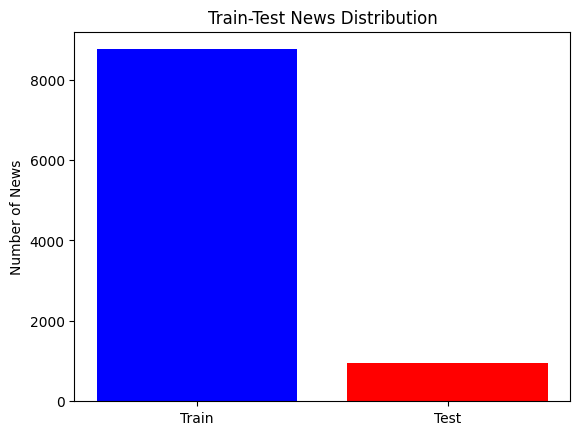

In [ ]:
#plot
import matplotlib.pyplot as plt
real_new_count = len(X_train_val_combined)
fake_new_count = len(X_test_val_combined)
print(real_new_count, fake_new_count)

#create the bar plot
plt.bar(['Train', 'Test'], [real_new_count, fake_new_count], color = ['blue', 'red'])
plt.title('Train-Test News Distribution')
plt.ylabel('Number of News')

plt.show()

In [ ]:
'''
#fasttext format txt
fasttext_format = []
with open('all_data.txt', 'w', encoding='utf-8') as file:
    for i in range(len(data)):
        #file.write(labels[i] + ' ' + data[i] + '\n')
        fasttext_format.append(label[i] + ' ' + data[i] + '\n')
'''

In [ ]:

'''
from sklearn.model_selection import train_test_split
train,test = train_test_split(fasttext_format, test_size=0.2, random_state=42)
'''

In [ ]:
'''
print(len(X_train_val_combined),len(y_train_val_combined))
print(len(X_test_val_combined),len(y_test_val_combined))

'''

#train_texts = []
#train_labels = []
#
#test_texts = []
#test_labels = []

if((len(X_train_val_combined) == len(y_train_val_combined)) and (len(X_test_val_combined) == len(y_test_val_combined))):
  print("esit!" + "train->" +str(len(X_train_val_combined)) + " " + "test ->" + str(len(y_test_val_combined)) )


with open('train.txt', 'w', encoding='utf-8') as file:
    for i in range(len(X_train_val_combined)):
        file.write(y_train_val_combined[i] + ' ' + X_train_val_combined[i] + '\n')
        #train_labels.append(i.split(' ')[0])
        #train_texts.append(i.split(' ')[1:])

with open ('test.txt', 'w', encoding='utf-8') as file:
    for i in range(len(X_test_val_combined)):
        file.write(y_test_val_combined[i] + ' ' + X_test_val_combined[i] + '\n');
        #test_labels.append(i.split(' ')[0])
        #test_texts.append(i.split(' ')[1:])

esit!train->8756 test ->960


In [8]:
with open('/content/drive/My Drive/Colab Notebooks/train.txt', 'w', encoding='utf-8') as file:
    for i in range(len(X_train_val_combined)):
        file.write(y_train_val_combined[i] + ' ' + X_train_val_combined[i] + '\n')

In [ ]:
model = fasttext.train_supervised(input='train.txt', epoch=10, lr=0.7, wordNgrams=3, verbose=2, bucket = 200000 , dim = 300, minCount=3, loss='hs')
#pretrained_vectors='./cc.tr.300.vec'

# 100 0.5 ->


DENEME


In [ ]:
epoch_num = 25
lr_list = [0.1, 0.3 , 0.5, 0.7, 1]
d = dict()
for epoch in range(epoch_num):
    for lr in lr_list:
      print("epoch num :", epoch + 1, "lr:", lr)
      model = fasttext.train_supervised(input='train.txt', epoch=epoch, lr=lr, wordNgrams=3, verbose=2, bucket = 200000 , dim = 300, minCount=3, loss='hs')
      print(model.test('test.txt'))
      d["epoch num: " + str(epoch + 1)+ " - lr: ", str(lr)] = model.test('test.txt')

print(d)



epoch num : 1 lr: 0.1
(960, 0.525, 0.525)
epoch num : 1 lr: 0.3
(960, 0.525, 0.525)
epoch num : 1 lr: 0.5
(960, 0.525, 0.525)
epoch num : 1 lr: 0.7
(960, 0.525, 0.525)
epoch num : 1 lr: 1
(960, 0.525, 0.525)
epoch num : 2 lr: 0.1
(960, 0.5822916666666667, 0.5822916666666667)
epoch num : 2 lr: 0.3
(960, 0.5333333333333333, 0.5333333333333333)
epoch num : 2 lr: 0.5
(960, 0.5604166666666667, 0.5604166666666667)
epoch num : 2 lr: 0.7
(960, 0.728125, 0.728125)
epoch num : 2 lr: 1
(960, 0.9416666666666667, 0.9416666666666667)
epoch num : 3 lr: 0.1
(960, 0.5416666666666666, 0.5416666666666666)
epoch num : 3 lr: 0.3
(960, 0.6197916666666666, 0.6197916666666666)
epoch num : 3 lr: 0.5
(960, 0.9416666666666667, 0.9416666666666667)
epoch num : 3 lr: 0.7
(960, 0.965625, 0.965625)
epoch num : 3 lr: 1
(960, 0.9802083333333333, 0.9802083333333333)
epoch num : 4 lr: 0.1
(960, 0.5375, 0.5375)
epoch num : 4 lr: 0.3
(960, 0.928125, 0.928125)
epoch num : 4 lr: 0.5
(960, 0.9739583333333334, 0.97395833333333

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
model.test('test.txt')
#(960, 0.9854166666666667, 0.9854166666666667) -> epoch - > 100

#(960, 0.9875, 0.9875) 25 0.5
#(960, 0.984375, 0.984375) 25 0.1
#(960, 0.9458333333333333, 0.9458333333333333) 10 0.1

(960, 0.9854166666666667, 0.9854166666666667)

In [ ]:

test_data = []
with open("test.txt", "r", encoding="utf-8") as file:
    for line in file:
        test_data.append(line.strip().split())

predictions = []
labels = []
for row in test_data:
    label = row[0]
    text = " ".join(row[1:])
    pred_label = model.predict(text)[0][0]
    predictions.append(pred_label)
    labels.append(label)

# Karışıklık matrisini oluştur
cm = confusion_matrix(labels, predictions)

# Karışıklık matrisini göster
print("Confusion Matrix:")
print(cm)

'''
epoch - > 100
Confusion Matrix:
[[448   8]
 [  6 498]]

'''

'''
25
Confusion Matrix:
[[448   8]
 [  7 497]]



'''



'''
Confusion Matrix:
[[449   7]
 [  7 497]]
\n25\nConfusion Matrix:\n[[448   8]\n [  7 497]]\n\n
100 0.5
(960, 0.9854166666666667, 0.9854166666666667)
'''

'''

10 0.7
(960, 0.9854166666666667, 0.9854166666666667)
[[450   6]
 [  8 496]]
'''

Confusion Matrix:
[[450   6]
 [  8 496]]


'\nConfusion Matrix:\n[[449   7]\n [  7 497]]\n\n25\nConfusion Matrix:\n[[448   8]\n [  7 497]]\n\n\n100 0.5\n(960, 0.9854166666666667, 0.9854166666666667)\n'

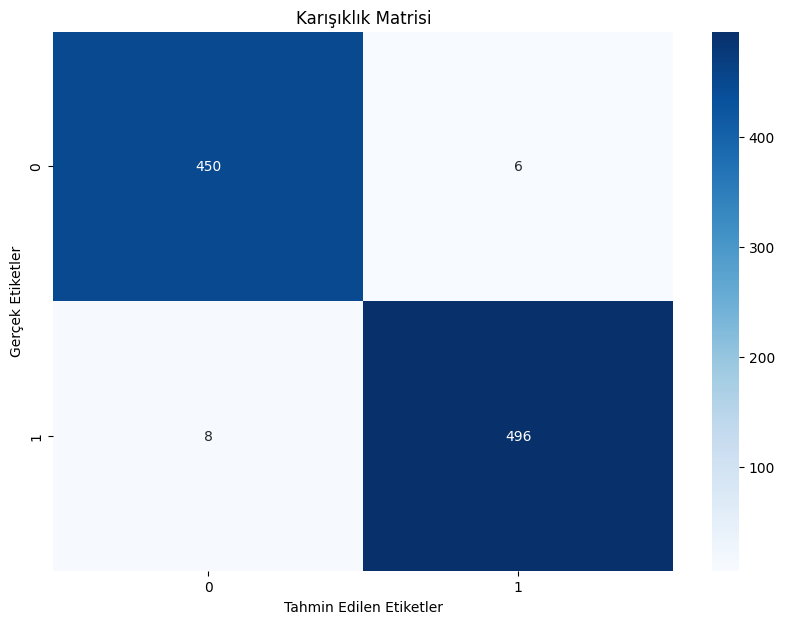

In [ ]:
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Gerçek etiketler ve tahminler
# labels: Gerçek etiketlerin listesi
# predictions: Modelin tahmin ettiği etiketlerin listesi

# Precision (Kesinlik) hesaplama
precision = precision_score(labels, predictions, average='weighted')

# Recall (Duyarlılık) hesaplama
recall = recall_score(labels, predictions, average='weighted')

# F-score hesaplama
fscore = f1_score(labels, predictions, average='weighted')

# Sonuçları yazdır
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F-score: {:.4f}".format(fscore))

'''
epoch - > 100
Precision: 0.9854
Recall: 0.9854
F-score: 0.9854

'''


'''
25
Precision: 0.9844
Recall: 0.9844
F-score: 0.9844

'''


Precision: 0.9854
Recall: 0.9854
F-score: 0.9854


'\n25\nPrecision: 0.9844\nRecall: 0.9844\nF-score: 0.9844\n\n'

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(labels, predictions, target_names=['Fake', 'Real'])

print(report)

'''
            precision    recall  f1-score   support

        Fake       0.98      0.98      0.98       456
        Real       0.98      0.99      0.99       504

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

'''

              precision    recall  f1-score   support

        Fake       0.98      0.99      0.98       456
        Real       0.99      0.98      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



'\n            precision    recall  f1-score   support\n\n        Fake       0.98      0.98      0.98       456\n        Real       0.98      0.99      0.99       504\n\n    accuracy                           0.98       960\n   macro avg       0.98      0.98      0.98       960\nweighted avg       0.98      0.98      0.98       960\n\n'